# Random Forest Regression

## Importing the libraries

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as sm

## Importing the dataset

In [40]:
dataset = pd.read_csv('Housing.csv')
X = dataset.iloc[ : , 1:].values
y = dataset.iloc[ : , 0].values
print(X)
print(y)

[[7420 4 2 ... 2 'yes' 'furnished']
 [8960 4 4 ... 3 'no' 'furnished']
 [9960 3 2 ... 2 'yes' 'semi-furnished']
 ...
 [3620 2 1 ... 0 'no' 'unfurnished']
 [2910 3 1 ... 0 'no' 'furnished']
 [3850 3 1 ... 0 'no' 'unfurnished']]
[13300000 12250000 12250000 12215000 11410000 10850000 10150000 10150000
  9870000  9800000  9800000  9681000  9310000  9240000  9240000  9100000
  9100000  8960000  8890000  8855000  8750000  8680000  8645000  8645000
  8575000  8540000  8463000  8400000  8400000  8400000  8400000  8400000
  8295000  8190000  8120000  8080940  8043000  7980000  7962500  7910000
  7875000  7840000  7700000  7700000  7560000  7560000  7525000  7490000
  7455000  7420000  7420000  7420000  7350000  7350000  7350000  7350000
  7343000  7245000  7210000  7210000  7140000  7070000  7070000  7035000
  7000000  6930000  6930000  6895000  6860000  6790000  6790000  6755000
  6720000  6685000  6650000  6650000  6650000  6650000  6650000  6650000
  6629000  6615000  6615000  6580000  65100

## Encoding categorical data

### Encoding the Binary Independent Variable

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,4] = le.fit_transform(X[:,4])
X[:,5] = le.fit_transform(X[:,5])
X[:,6] = le.fit_transform(X[:,6])
X[:,7] = le.fit_transform(X[:,7])
X[:,8] = le.fit_transform(X[:,8])
X[:,10] = le.fit_transform(X[:,10])
X[:,11] = le.fit_transform(X[:,11])
print(X)

[[7420 4 2 ... 2 1 0]
 [8960 4 4 ... 3 0 0]
 [9960 3 2 ... 2 1 1]
 ...
 [3620 2 1 ... 0 0 2]
 [2910 3 1 ... 0 0 0]
 [3850 3 1 ... 0 0 2]]


## Splitting the dataset into the Training set and Test set

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Training the Random Forest Regression model on the whole dataset

In [43]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

## Predicting the Test set results

In [44]:
y_pred = regressor.predict(X_test)
A=np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(A)

[[ 4436950.   4585000. ]
 [ 5470500.   6083000. ]
 [ 4653950.   4007500. ]
 [ 6493900.   6930000. ]
 [ 3057075.   2940000. ]
 [ 6912150.   6195000. ]
 [ 3352562.5  3535000. ]
 [ 3922100.   2940000. ]
 [ 3661000.   3500000. ]
 [ 7801500.   7980000. ]
 [ 6247500.   6755000. ]
 [ 3678500.   3990000. ]
 [ 4288200.   3150000. ]
 [ 4798500.   3290000. ]
 [ 4789750.   4130000. ]
 [ 2310000.   2660000. ]
 [ 4303250.   4410000. ]
 [ 4513600.   3710000. ]
 [ 3489500.   3360000. ]
 [ 3680250.   4270000. ]
 [ 7301000.   5005000. ]
 [ 5978700.   5383000. ]
 [ 4428375.   6440000. ]
 [ 2546250.   1890000. ]
 [ 6380150.   6125000. ]
 [ 4622450.   5460000. ]
 [ 5638500.   5803000. ]
 [ 5550300.   4620000. ]
 [ 4512550.   5530000. ]
 [ 5741750.   5950000. ]
 [ 3650150.   4305000. ]
 [ 4782067.5  3640000. ]
 [ 7365750.   5250000. ]
 [ 3225250.   3325000. ]
 [ 4781000.   3703000. ]
 [ 4336850.   4753000. ]
 [ 5841850.   9100000. ]
 [ 3951500.   3500000. ]
 [ 3315900.   3150000. ]
 [ 3789450.   4270000. ]


## Error in Prediction in Price

In [32]:
total_error=0
for i in range(0,len(A)):
    error=abs(A[i][0]-A[i][1])
    total_error+=error
Final_error=total_error/len(A)
print(Final_error)

823385.5321100918


## Visualization

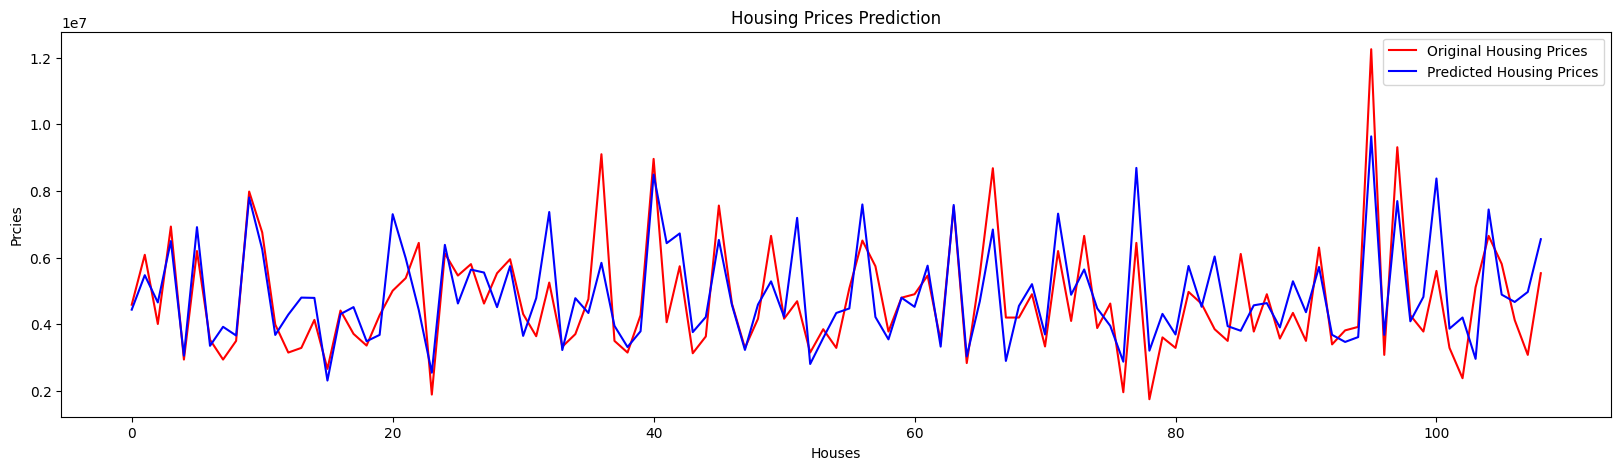

In [34]:
# visualizing the whole testing data results
train_size=len(X_train)
fig = plt.figure(figsize=[20,5])
ax = fig.add_subplot(1,1,1)
plt.plot(y_test, color = 'red', label = 'Original Housing Prices')
plt.plot(y_pred, color = 'blue', label = 'Predicted Housing Prices')
plt.title('Housing Prices Prediction')
plt.xlabel('Houses')
plt.ylabel('Prcies')
plt.legend()
plt.show()